In [1]:
#import pandas, numpy, spotipy, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import matplotlib.pylab as plt

In [2]:
#login and authorization credentials
client = '91215105605748889a948c791dd7c1ca'
secret = 'c63ad8f635da469383c47cfd2fa0d2f3'
my_username = 'clwang07733'
username = '1235663476'
redirect_uri = 'https://developer.spotify.com/dashboard/applications/91215105605748889a948c791dd7c1ca'
goodPlaylistID = '7umNGrCO2vgK5DCOadw8t1?si=U0x18FqkQvuIWC_f2xUWqg'
badPlaylistID = '74EBZChFKDeVVHpaoTQQcj?si=LjU_FhXESQC_0prqF36eyA'

#accessing private playlist and creating public playlist with my recommendations
scope = 'user-library-read playlist-modify-public playlist-read-private'

#DO NOT CHANGE
client_credentials_manager = SpotifyClientCredentials(client_id = client, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
token = util.prompt_for_user_token(username, scope, client, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth = token)
else:
    print("Can't get token for", username)

In [3]:
#Returns two arrays with the song names and song features
def get_song_info(userID, playlistID):
    song_names, song_ids, song_features = [], [], []
    playlist_dict = sp.user_playlist(userID, playlistID)
    temp_playlist = playlist_dict["tracks"]["items"]
    for i in temp_playlist:
        song_names.append(i["track"]["name"])
        song_ids.append(i["track"]["id"])
        
    song_features = sp.audio_features(song_ids)
    return song_names, song_features

In [5]:
#makes pandas dataframe out of the playlist
def make_song_df(user_ID, playlistID):
    song_names, song_features = get_song_info(user_ID, playlistID)
    song_features_frame = pd.DataFrame(song_features)
    song_id_list = list(song_features_frame['id'])
    song_names_frame = pd.DataFrame({'name': song_names, 'id': song_id_list})
    df = song_features_frame.merge(song_names_frame, left_on='id', right_on='id')
    return df

#combines the good and bad song dataframes together
def combine_df(good_song_df, bad_song_df):
    like = np.ones((len(good_song_df.index),), dtype=int)
    dislike = np.zeros((len(bad_song_df.index),), dtype=int)
    good_song_df["like"] = like
    bad_song_df["like"] = dislike
    return good_song_df.append(bad_song_df)

good_song_df = make_song_df(username, goodPlaylistID)
bad_song_df = make_song_df(username, badPlaylistID)
total_df = combine_df(good_song_df, bad_song_df)

total_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,name,like
0,0.210000,https://api.spotify.com/v1/audio-analysis/6ZzY...,0.503,233601,0.581,6ZzYETKetIfNUsZUb23jgG,0.000708,6,0.2570,-7.007,1,0.0881,94.555,4,https://api.spotify.com/v1/tracks/6ZzYETKetIfN...,audio_features,spotify:track:6ZzYETKetIfNUsZUb23jgG,0.633,Day 1 ◑,1
1,0.359000,https://api.spotify.com/v1/audio-analysis/6Tod...,0.409,280842,0.678,6TodWdTSDfzwgYynTZSvJn,0.000005,9,0.1670,-7.731,1,0.0878,89.968,4,https://api.spotify.com/v1/tracks/6TodWdTSDfzw...,audio_features,spotify:track:6TodWdTSDfzwgYynTZSvJn,0.168,Midsummer Madness,1
2,0.071000,https://api.spotify.com/v1/audio-analysis/6pAC...,0.480,267733,0.526,6pAC6ykvbcetfLl9pMQ97v,0.000000,5,0.0879,-7.099,1,0.2750,199.662,3,https://api.spotify.com/v1/tracks/6pAC6ykvbcet...,audio_features,spotify:track:6pAC6ykvbcetfLl9pMQ97v,0.374,I Like U,1
3,0.771000,https://api.spotify.com/v1/audio-analysis/41Cg...,0.426,204712,0.408,41CgzGD7xlgnJe14R4cqkL,0.000008,3,0.3940,-9.419,1,0.0524,76.309,4,https://api.spotify.com/v1/tracks/41CgzGD7xlgn...,audio_features,spotify:track:41CgzGD7xlgnJe14R4cqkL,0.528,Paris in the Rain,1
4,0.419000,https://api.spotify.com/v1/audio-analysis/32xx...,0.766,220160,0.500,32xx0fAv3CIeGmNaWTHvEF,0.000000,1,0.1080,-7.626,1,0.1520,107.045,4,https://api.spotify.com/v1/tracks/32xx0fAv3CIe...,audio_features,spotify:track:32xx0fAv3CIeGmNaWTHvEF,0.495,Heebiejeebies - Bonus,1
5,0.741000,https://api.spotify.com/v1/audio-analysis/57K5...,0.457,157199,0.275,57K5RyWj4jOlc07wRz6axh,0.000000,11,0.1150,-12.553,1,0.0468,120.044,4,https://api.spotify.com/v1/tracks/57K5RyWj4jOl...,audio_features,spotify:track:57K5RyWj4jOlc07wRz6axh,0.180,Plastic (Mid-City Island Version),1
6,0.355000,https://api.spotify.com/v1/audio-analysis/6M8R...,0.686,218947,0.755,6M8R1IOnnbtKBogIs6uqRF,0.000000,4,0.1380,-6.213,0,0.0916,113.860,4,https://api.spotify.com/v1/tracks/6M8R1IOnnbtK...,audio_features,spotify:track:6M8R1IOnnbtKBogIs6uqRF,0.344,Fantasy,1
7,0.530000,https://api.spotify.com/v1/audio-analysis/6fTd...,0.511,226014,0.596,6fTdcGsjxlAD9PSkoPaLMX,0.000000,0,0.0798,-6.560,1,0.2240,158.063,4,https://api.spotify.com/v1/tracks/6fTdcGsjxlAD...,audio_features,spotify:track:6fTdcGsjxlAD9PSkoPaLMX,0.554,Sunday Candy,1
8,0.868000,https://api.spotify.com/v1/audio-analysis/4Cr5...,0.546,181505,0.221,4Cr5ZdbgntUlinyEfrFYIl,0.000000,2,0.0994,-8.915,1,0.0630,128.144,4,https://api.spotify.com/v1/tracks/4Cr5ZdbgntUl...,audio_features,spotify:track:4Cr5ZdbgntUlinyEfrFYIl,0.593,Lemonade - Ukulele Version,1
9,0.021400,https://api.spotify.com/v1/audio-analysis/6kOr...,0.690,209446,0.732,6kOrmPz9pkGzL4umBBRmWy,0.000000,6,0.0579,-5.499,1,0.0444,129.875,4,https://api.spotify.com/v1/tracks/6kOrmPz9pkGz...,audio_features,spotify:track:6kOrmPz9pkGzL4umBBRmWy,0.661,Chivalry Is Dead,1


In [23]:
def hist_generator(df, column):
    hist = sns.distplot(df[column])
    return hist

def violin_generator(df, column):
    viol = sns.violinplot(df[column])
    return viol

def boxplot_generator(df, column):
    boxplot = sns.boxplot(df[column])
    return boxplot

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


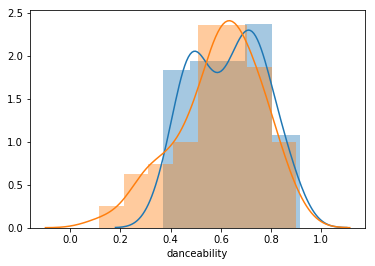

In [24]:
hist_generator(good_song_df, 'danceability')
hist_generator(bad_song_df, 'danceability')

In [27]:
from sklearn.model_selection import train_test_split
features = ["acousticness", "danceability", "energy", "valence", "loudness"]
train, test = train_test_split(total_df, test_size=.25, random_state=0)

train_x = train[features]
train_y = train["like"]

test_x = test[features]
test_y = test["like"]

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
knn.score(test_x, test_y)

0.7619047619047619

In [29]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression()
linear.fit(train_x, train_y)
y_pred = linear.predict(test_x)
linear.score(test_x, test_y)

0.7619047619047619

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
y_pred = rfc.predict(test_x)
rfc.score(test_x, test_y)

0.8095238095238095

In [33]:
#add new column with the like column
#only select the rows with 1 in the like column
#add those to a playlist

test_user = 'spotify'
test_playlist_id = '37i9dQZF1DXcBWIGoYBM5M?si=RwfKG1WDTE6KPO4OJ9sAxA'

In [34]:
def recommended_playlist(user_ID, playlistID, playlist_owner_ID):
    song_df = make_song_df(playlist_owner_ID, playlistID)
    test_x = song_df[features]
    like_array = rfc.predict(test_x)
    song_df['like'] = like_array
    song_df = song_df.loc[song_df['like'] == 1]
    
    new_playlist = sp.user_playlist_create(user_ID, "Recommended Playlist")
    new_playlist_id = new_playlist['id']

    sp.user_playlist_add_tracks(user_ID, new_playlist_id, song_df['id'])
    
recommended_playlist(my_username, test_playlist_id, test_user)